In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install chart-studio

     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=d48f96bff3383c3edb32212c27227ca0eedd176d030b2dcb1332f3eac56a4812
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
from chart_studio import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import scipy.stats #for a bit of statistiscs
%matplotlib inline

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/UoB Dissertation Folder/foreveralone...csv")

In [ ]:
test.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [ ]:
test.shape

(469, 19)

In [ ]:
test['attempt_suicide'].value_counts(normalize=True)

No     0.818763
Yes    0.181237
Name: attempt_suicide, dtype: float64

In [ ]:
test['depressed'].value_counts(normalize=True)

Yes    0.665245
No     0.334755
Name: depressed, dtype: float64

In [ ]:
test['social_fear'].value_counts(normalize=True)

Yes    0.656716
No     0.343284
Name: social_fear, dtype: float64

In [ ]:
test['race'].value_counts(normalize=True)

White non-Hispanic                                                                 0.716418
Asian                                                                              0.115139
Hispanic (of any race)                                                             0.068230
Black                                                                              0.046908
Mixed                                                                              0.006397
Middle Eastern                                                                     0.004264
Indian                                                                             0.004264
half Arab                                                                          0.002132
Mixed race                                                                         0.002132
First two answers. Gender is androgyne, not male; sexuality is asexual, not bi.    0.002132
White and Native American                                                       

In [ ]:
test['edu_level'].value_counts(normalize=True)

Some college, no degree                                               0.292111
Bachelor’s degree                                                     0.255864
High school graduate, diploma or the equivalent (for example: GED)    0.198294
Some high school, no diploma                                          0.106610
Master’s degree                                                       0.059701
Associate degree                                                      0.038380
Trade/technical/vocational training                                   0.025586
Professional degree                                                   0.012793
Doctorate degree                                                      0.010661
Name: edu_level, dtype: float64

In [ ]:
# change dataype to int
test['friends'] = test['friends'].astype(np.int64)

In [ ]:
#drop rows with null values
test.dropna(inplace=True)

In [ ]:
# strip stings with white space
test['job_title'] = test.job_title.str.strip()

In [ ]:
# Function to replace job_title values
def replace_text(what, to):
    test.replace(what, to, inplace= True)

In [ ]:
replace_text('student', 'Student')
replace_text('none', 'None')
replace_text("N/a", 'None')
replace_text('na', 'None')
replace_text('-', 'None')
replace_text('.', 'None')
replace_text('*', 'None')
replace_text('ggg', 'None')

In [ ]:
test.job_title.value_counts()

Student                         82
None                            51
Unemployed                      13
Engineer                         9
Software Engineer                6
                                ..
Accounts Receivable              1
Zivildiener (austrian stuff)     1
RN                               1
Freelance writer                 1
Scientist                        1
Name: job_title, Length: 258, dtype: int64

In [ ]:
# body weight
test.bodyweight.value_counts()

Normal weight    265
Overweight       110
Underweight       57
Obese             25
Name: bodyweight, dtype: int64

In [ ]:
# sexuality freqency

test.sexuallity.value_counts()

Straight       404
Bisexual        45
Gay/Lesbian      8
Name: sexuallity, dtype: int64

# Univariate Analysis


In [ ]:
test.gender.value_counts()

Male                  382
Female                 72
Transgender male        2
Transgender female      1
Name: gender, dtype: int64

Univariante Analysis

Variables visualisation based on data type: Categorical, ordinal and numerical.

Categorical features:(Gender, depressed, attempt_sucide,sexuality)

Ordinal features:(age, Education,)

Numerical features:(Income)

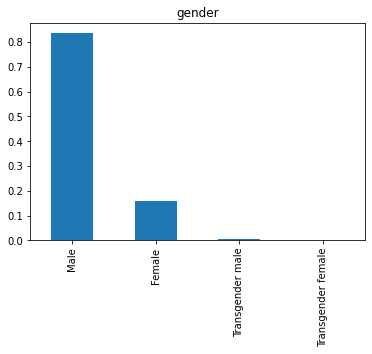

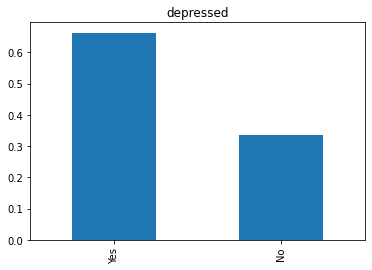

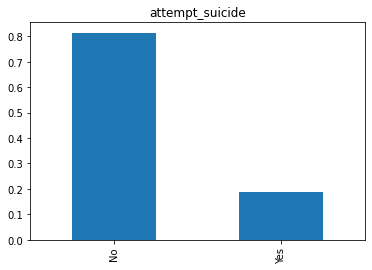

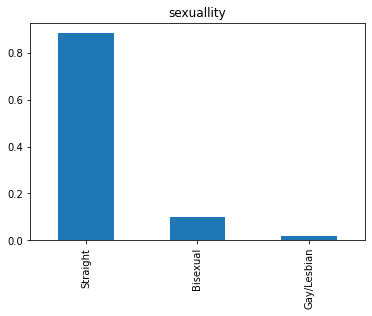

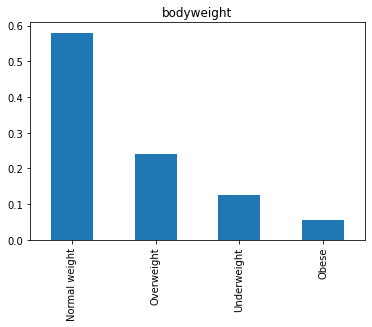

In [ ]:
test['gender'].value_counts(normalize=True).plot.bar(title='gender')
plt.show()
test['depressed'].value_counts(normalize=True).plot.bar(title='depressed')
plt.show()
test['attempt_suicide'].value_counts(normalize=True).plot.bar(title='attempt_suicide')
plt.show()
test['sexuallity'].value_counts(normalize=True).plot.bar(title='sexuallity')
plt.show()
test['bodyweight'].value_counts(normalize=True).plot.bar(title='bodyweight')
plt.show()

Independent Variable (Ordinal)

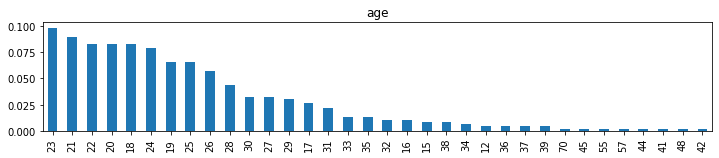

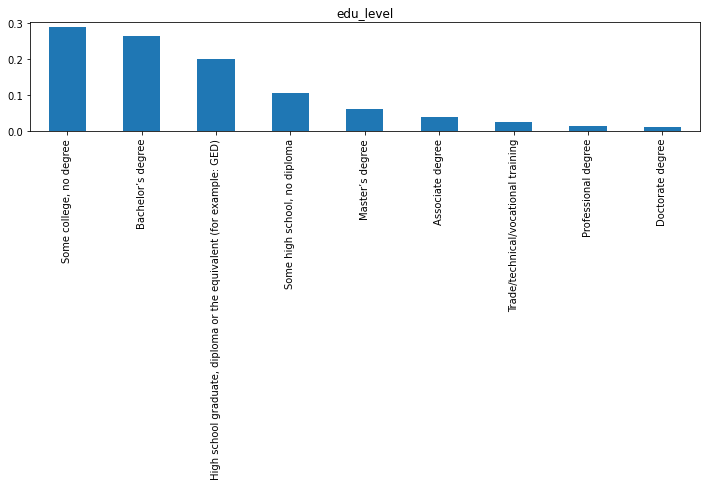

In [ ]:
test['age'].value_counts(normalize=True).plot.bar(figsize=(12,2), title='age')
plt.show()
test['edu_level'].value_counts(normalize=True).plot.bar(figsize=(12,2), title='edu_level')
plt.show()


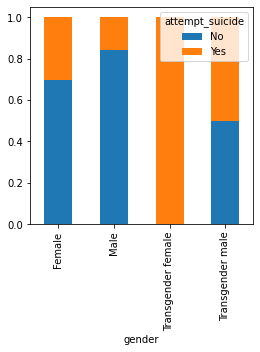

In [ ]:
Gender=pd.crosstab(test['gender'],test['attempt_suicide'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

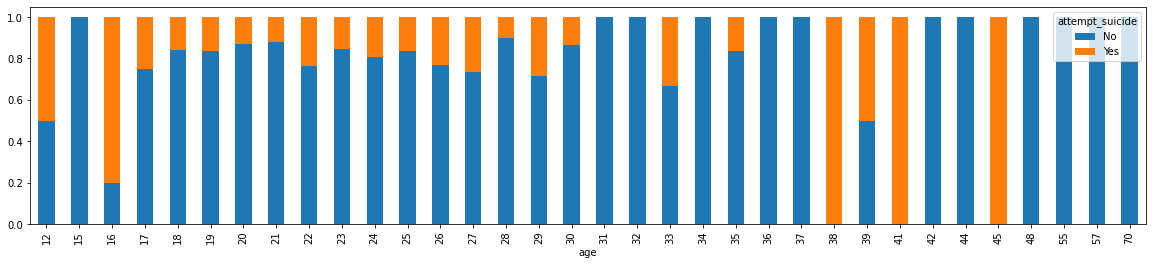

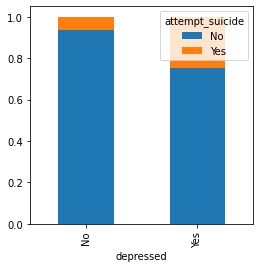

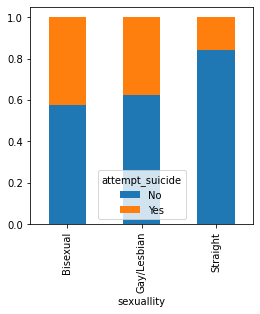

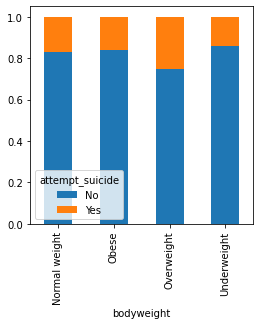

In [ ]:
Age=pd.crosstab(test['age'],test['attempt_suicide'])
Depressed=pd.crosstab(test['depressed'],test['attempt_suicide'])
Sexuality=pd.crosstab(test['sexuallity'], test['attempt_suicide'])
Body_weight=pd.crosstab(test['bodyweight'],test['attempt_suicide'])
Age.div(Age.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(20,4))
plt.show()
Depressed.div(Depressed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Sexuality.div(Sexuality.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Body_weight.div(Body_weight.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

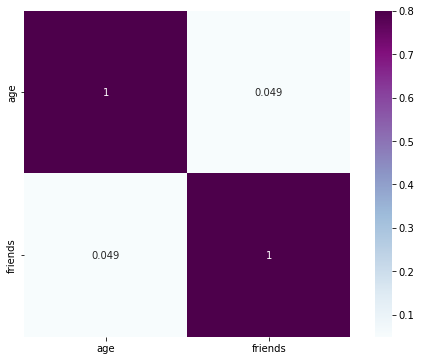

In [ ]:
matrix = test.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [ ]:
test.describe()

,age,friends
count,457.000000,457.000000
mean,24.032823,8.089716
std,6.045969,34.805075
min,12.000000,0.000000
25%,20.000000,1.000000
50%,23.000000,3.000000
75%,26.000000,7.000000
max,70.000000,600.000000


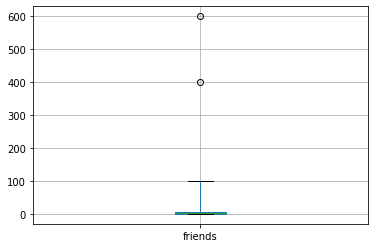

In [ ]:
fig, ax = plt.subplots()
# ax.set_ylim(0, 105)
# whiskers on 0.3 and 99.7 percentile to determine outliers
test.boxplot(column='friends', ax=ax, whis=[0.3,99.7])

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friends, dtype: object

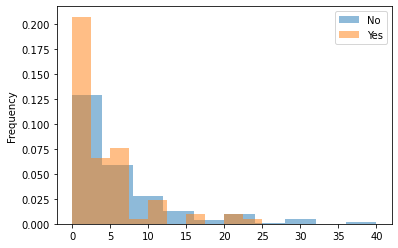

In [ ]:
test.loc[test['friends'] <= 50,:] \
        .groupby('attempt_suicide')['friends'] \
        .plot.hist(legend=True, density=True, alpha = 0.5)

In [ ]:
test['improve_yourself_how'].head(15)

0                                                  None
1                      join clubs/socual clubs/meet ups
2                                        Other exercise
3                            Joined a gym/go to the gym
4                                                  None
5     Joined a gym/go to the gym, join clubs/socual ...
6                                                  None
7     Therapy, join clubs/socual clubs/meet ups, Non...
8                   Joined a gym/go to the gym, Therapy
9                                               Therapy
10     Other exercise, join clubs/socual clubs/meet ups
11           Joined a gym/go to the gym, Other exercise
12    Joined a gym/go to the gym, Therapy, join club...
13                                                 None
14    Cosmetic survey, Joined a gym/go to the gym, T...
Name: improve_yourself_how, dtype: object

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_improves, dtype: object

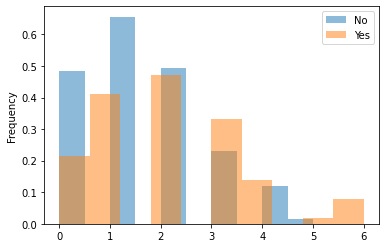

In [ ]:
test['improve_yourself_how'] = test['improve_yourself_how'].str.lower()
# none isn't an improvment, so we don't need to count it
test['total_improves'] = test['improve_yourself_how'].str.split(',').apply(lambda x: len([i for i in x if i != 'none']))
test.groupby('attempt_suicide')['total_improves'].plot.hist(legend=True, density=True, alpha = 0.5)

In [ ]:
improvements = test['improve_yourself_how'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)
improvements = improvements.str.strip()
top_improvements = improvements.value_counts()

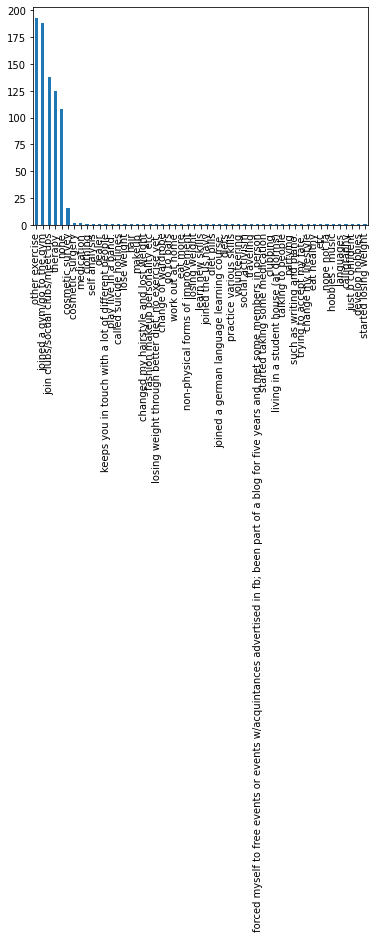

In [ ]:
top_improvements.plot(kind='bar')

In [ ]:
# Most of improvements found in the dataset only once. 
# Actually there are some mistypes and values with pretty similar sense. But for now let's leave it as it is.
# As far as they can't help us to understand polulation, it's good idea to remove these improvements

In [ ]:
top_improvements = top_improvements[top_improvements > 5]

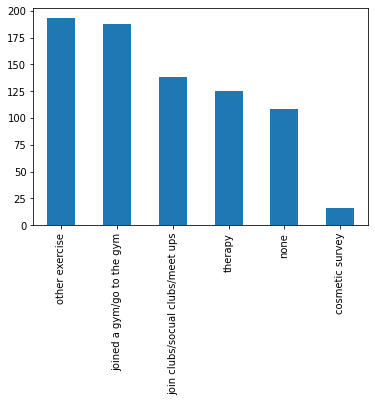

In [ ]:
top_improvements.plot(kind='bar')

In [ ]:
# Much better.
# Now lets add these improvements to the data set as new features

In [ ]:
for imp in top_improvements.index:
    test['[improve] {}'.format(imp)] = test['improve_yourself_how'].str.contains(imp, regex=False)

In [ ]:
col = {x:'sum' for x in test.columns if '[improve]' in x}
test.groupby('attempt_suicide').agg(col).apply(lambda x: x/x.sum(), axis=1)

,[improve] other exercise,[improve] joined a gym/go to the gym,[improve] join clubs/socual clubs/meet ups,[improve] therapy,[improve] none,[improve] cosmetic survey
attempt_suicide,,,,,,
No,0.251256,0.254606,0.180905,0.137353,0.155779,0.020101
Yes,0.251462,0.210526,0.175439,0.251462,0.087719,0.023392


In [ ]:
test['income'] = test['income'].apply(lambda x: x.split("$")[-1])

In [ ]:
test['income'].value_counts()

0                  150
10,000              99
19,999              58
29,999              44
39,999              39
74,999              27
49,999              16
99,999               9
149,999              6
124,999              3
174,999              2
199,999              2
200,000 or more      2
Name: income, dtype: int64

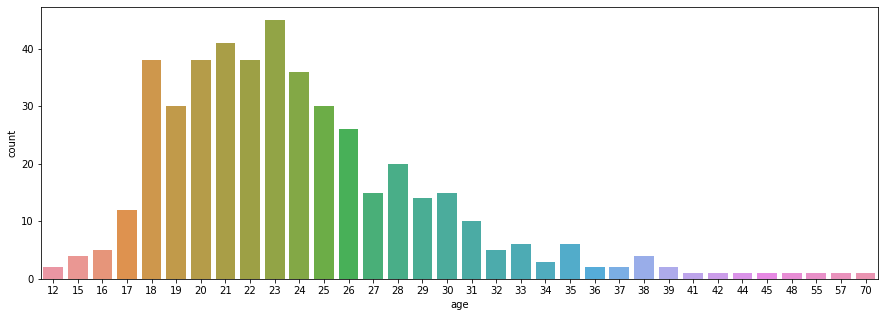

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('age',data=test)

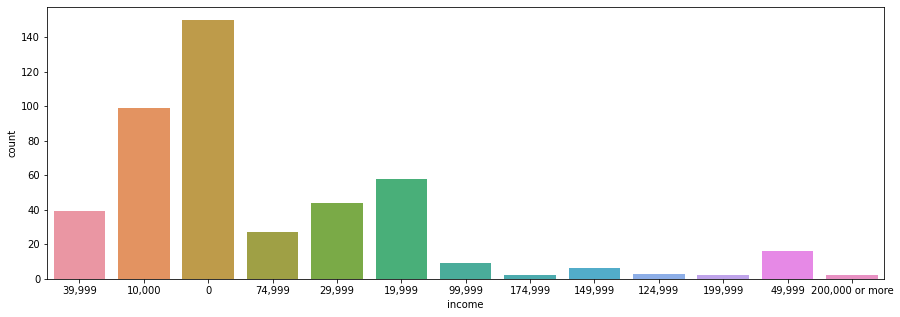

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('income',data=test)

What is the most common way in which people try to improve themselves?
What is the most common favour that people want?
Is there a relationship between depression and virginity?
Is there a relationship between bodyweight and virginity?

The first two questions are simple aggregations. They don't need a lot of thinking about. The nex three however, need a little more code and they do produce some rather unexpected results. So, let's start!

In [ ]:
test["what_help_from_others"].unique()

array(['wingman/wingwoman, Set me up with a date',
       'wingman/wingwoman, Set me up with a date, date coaching',
       "I don't want help", 'date coaching',
       'Set me up with a date, date coaching',
       'wingman/wingwoman, date coaching', 'Set me up with a date',
       'wingman/wingwoman, Set me up with a date, date coaching, someone to kill.me',
       'wingman/wingwoman, someone to hang out with me where I can meet met (e.g. class, free event) and sell me up',
       "wingman/wingwoman, Set me up with a date, I don't want help",
       'wingman/wingwoman',
       'wingman/wingwoman, Set me up with a date, date coaching, anything',
       'Set me up with a date, Friends ',
       "wingman/wingwoman, Set me up with a date, I don't even know..",
       'Trust', "date coaching, I don't want help",
       'I want help but I am not sure what kind. I always think it would be nice if a woman would approch me but thats not realistic.',
       'fitness coaching',
       'wingman/

So, let's get on with the analysis. First up, which is the most common method of help that people want from others? To answer this, we'll need to look at the what_help_from_others column.

A few things pop out on looking at the result above:

There seem to be more than one answer per responder
The answers are all separated by a comma.
There are a few custom answers. I guess that these people had a lot of time on their hands (self-evident. They're single XD ).
So here's what we'll do:

We'll split based on the comma
We'll get the counts of each of the entries. Also, there's this entry "I don't want help". We'll ignore that.
We can do this programatically. But, there's another (pandas) method to help us do this: .get_dummies()

In [ ]:
# getting the most common form of help people want
test[test["what_help_from_others"] != "I don't want help"]["what_help_from_others"].str. \
    get_dummies(",").sum().sort_values(ascending = False)[:10]

wingman/wingwoman                                                                                                                127
 Set me up with a date                                                                                                            99
 date coaching                                                                                                                    75
Set me up with a date                                                                                                             62
date coaching                                                                                                                     24
 I don't want help                                                                                                                 6
I don't want help                                                                                                                  4
Friendship                                                           

Joining a gym seems to be the most common option to improve oneself. Honestly, I don't understand these people? Why join a gym when you can craft the bod-of-your-dreams at your local park with calisthenics? I bet that it's a sure fire way to get more people to notice you.

The third question: What's the relationship between depression and virginity? This is a pretty cool question. Seeing how reports of depression are reaching sky-high levels, this might shed some light into the problem.

In [ ]:
%matplotlib inline
sns.set()
plt.style.use("ggplot") # yea, I still love ggplot2

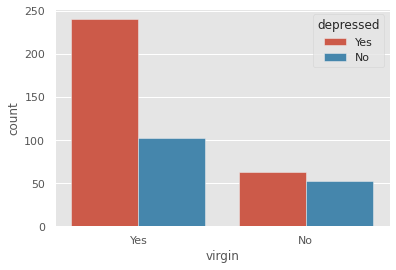

In [ ]:
sns.countplot(x = "virgin", data = test, hue = "depressed")

There seem to be more depressed people among virgins. There seem to be more depressed people among non-virgins. Overall, there seem to be more depressed people.

But, if we look at the percent differences in each of the categories, clearly, the difference is higher amongst the people who are virgins. This difference is 25% in the non-virgin group and a staggering 135% in the virgin group.

But, is this the true relationship? Is there a deviation from the expected value and is this deviation significant? Let's check it out.

In [ ]:
scipy.stats.chisquare(f_obs = [52, 65, 105, 247], f_exp = [39, 78, 118, 234]) 
# expected values were calculated by hand

Power_divergenceResult(statistic=8.65442561205273, pvalue=0.03425645888653506)

Well, the observed relationship does seem to differ from what it's supposed to be. Now, if assume that their depression is not caused by any other factor (we might ignore these since trying to measure them is too much work), we can ask a follow up question: Are the virgins single because they are depressed? Or are they depressed because they are single?

Even though we ignored other causes of depression, it's more likely that the people who are depressed have a hard time finding a partner because of their depression, which makes it hard for them to communicate. Cool.

The last question: Is there a relationship between bodyweight and virginity? This is a pretty interesting one. We saw earlier that the most common choice for self-improvement was to join a gym. Assumably, this has something to do with weight and/or appearance. People who are over weight are looking to lose the love handles, while those who are underweight are probably looking to get healthy. While those who are in the normal range might want to shape their bodies properly to attract more potential partners.

Enough talk. Let's get to the code.

Text(0.5, 0, 'Are you a virgin?')

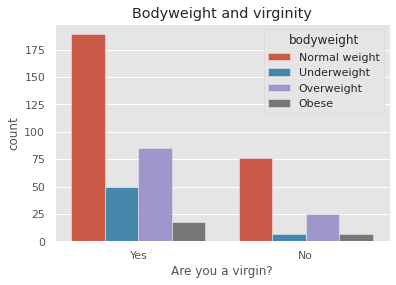

In [ ]:
sns.countplot(x = "virgin", data = test, hue = "bodyweight")
plt.title("Bodyweight and virginity")
plt.xlabel("Are you a virgin?")

In [ ]:
test.pivot_table("age", index = "virgin", columns = "bodyweight", aggfunc = "count")

bodyweight,Normal weight,Obese,Overweight,Underweight
virgin,,,,
No,76,7,25,7
Yes,189,18,85,50


As with the previous categorical relationship, we'll check if the observed relationship is different from the actual. [I've calculated the expected values by hand. The formula for calculating expected values is E(i, j) = (T(i) * T(j)) / N where E(i, j) is the expected value in the ith row and jth column T(i) is the total for the ith row T(j) is the total for the jth column and N is the overall total. ]

In [ ]:
# chisquare test on virginity and bodyweight
scipy.stats.chisquare(f_obs = [77, 7, 25, 8, 192, 18, 88, 54], 
	f_exp = [67.10, 6.23, 28.19, 15.46, 201.89, 18.76, 84.81, 46.53])

Power_divergenceResult(statistic=7.351026023669052, pvalue=0.3932683313637481)

Whuuut?! The relationship between virginity and bodyweight doesn't seem to deviate too much from the actual relationship. If so, then why do so many people join the gym as a means to improve themselves? It's pretty counter intuitive.
Man alive, this is a cool finding.